### 2021_10_18_5

## 군집(Clustering) - Kmeans

### 학습 내용
* 01 Clustering(군집)의 목적
* 02 k-평균 알고리즘으로 찾은 클러스터 중심과 클러스터 경계
* 03 k-means 알고리즘 적용
* 04 생성된 데이터의 K-means 군집 모델 적용
* 05 군집 모델(K-means)의 주의점

In [2]:
### 한글 폰트 설정
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import matplotlib

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif platform.system()== "Darwin":
    rc('font', family = 'AppleGothic')
else:
    print("Unknown System")

### 01. Clustering(군집)의 목적
* 한 클러스터 안의 데이터 포인트끼리는 매우 비슷하다. 다른 클러스터의 데이터 포인터와는 구분되도록 데이터를 나누는 것이 목표이다.
* 분류 알고리즘과 비슷하게 군집 알고리즘은 각 데이터 포인트가 어느 클러스터에 속하는지 할당(또는 예측)한다.

In [3]:
import mglearn
%matplotlib inline

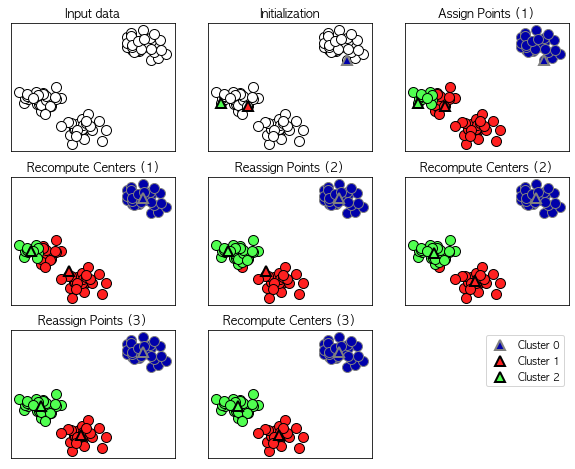

In [4]:
mglearn.plots.plot_kmeans_algorithm()

* 삼각형은 클러스터의 중심이고 원은 데이터 포인트이다.
* 클러스터는 색으로 구분한다.

### 02. k-평균 알고리즘으로 찾은 클러스터 중심과 클러스터 경계
* k-평균 군집은 가장 간단하며 널리 사용되는 군집 알고리즘이다.
* 이 알고리즘은 데이터의 어떤 영역을 대표하는 클러스터 중심(cluster center)을 찾는다. 학습을 시킨 클러스터 중심의 경계

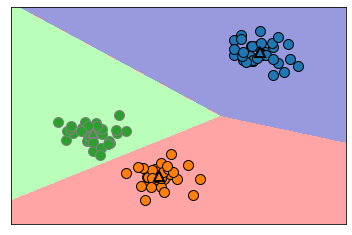

In [5]:
mglearn.plots.plot_kmeans_boundaries()

### 03. k-means 알고리즘 적용

In [6]:
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)

### 실제 원본 데이터 시각화

/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


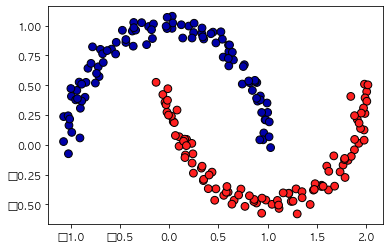

In [7]:
feature1 = X[:, 0]
feature2 = X[:, 1]
plt.scatter(feature1, feature2,
           c = y, 
           cmap = mglearn.cm2, s = 60, edgecolors = "k")

### K-Means 알고리즘 적용

In [8]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
y_pred = kmeans.predict(X)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0], dtype=int32)

/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


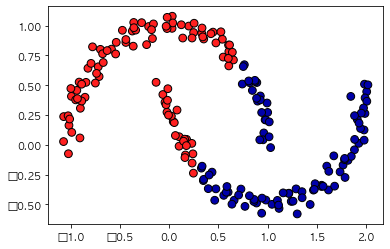

In [9]:
### K-Means 적용하여 할당한 클러스터 시각화
feature1 = X[:, 0]
feature2 = X[:, 1]
plt.scatter(feature1, feature2, c = y_pred, cmap = mglearn.cm2,
           s = 60, edgecolors = "k")

### Cluster Center

In [10]:
print(kmeans.cluster_centers_)
print(kmeans.cluster_centers_[:, 0]) # x좌표
print(kmeans.cluster_centers_[:, 1]) # y좌표

[[ 1.20736718 -0.0825517 ]
 [-0.2003285   0.58035606]]
[ 1.20736718 -0.2003285 ]
[-0.0825517   0.58035606]


### 그래프 위에 클러스터의 중심 표시

Text(0, 0.5, 'Feature 1')

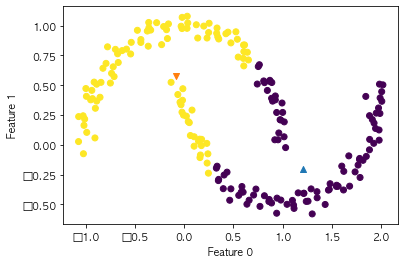

In [14]:
center1 = kmeans.cluster_centers_[:, 0]
center2 = kmeans.cluster_centers_[:, 1]

plt.scatter(feature1, feature2, c = y_pred)
# plt.scatter(centerX, centerY, marker = "^")
plt.scatter(center1[0], center1[1], marker = "^")
plt.scatter(center2[0], center2[1], marker = "v")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, '특성 1')

/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


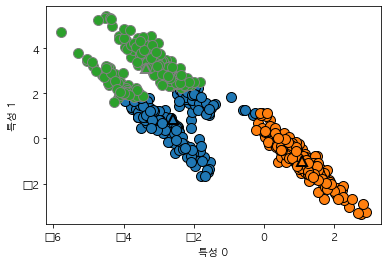

In [16]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np

# 무작위로 데이터 생성
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 데이터가 길게 늘어지도록 변경한다.
transformation = rng.normal(size=(2,2))
X = np.dot(X, transformation)

# 세 개의 클러스터로 데이터에 KMeans 알고리즘을 적용.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 나타낸다.
mglearn.discrete_scatter(X[:,0],
                         X[:,1],
                         kmeans.labels_,
                         markers='o')

mglearn.discrete_scatter(
   kmeans.cluster_centers_[:,0],
   kmeans.cluster_centers_[:,1], 
   [0,1,2],
   markers="^",
   markeredgewidth=2)

plt.xlabel('특성 0')
plt.ylabel('특성 1')